# capstone project

## Data analysis and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Pre-processing_1

In [3]:
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'INTKEY', 'COLDETKEY', 'REPORTNO', 'SEVERITYCODE.1', 'SEVERITYDESC', 'INCDTTM', 'LOCATION', 'ST_COLDESC'
             ,'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'EXCEPTRSNDESC', 'EXCEPTRSNCODE','SDOT_COLDESC'],axis=1,inplace=True)

In [4]:
df['STATUS'].replace(to_replace=['Unmatched','Matched'], value=[0,1],inplace=True)
df['INATTENTIONIND'].replace(to_replace=['NaN','Y'], value=[0,1],inplace=True)
df['PEDROWNOTGRNT'].replace(to_replace=['NaN','Y'], value=[0,1],inplace=True)
df['SPEEDING'].replace(to_replace=['NaN','Y'], value=[0,1],inplace=True)
df['UNDERINFL'].replace(to_replace=['N','0','Y','1'], value=[0,0,1,1],inplace=True)
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df.fillna(0, inplace=True)

In [5]:
df['ST_COLCODE']=df['ST_COLCODE'].apply(lambda x: np.NaN if str(x).isspace() else x)
df.dropna(inplace=True)
pd.to_numeric(df['ST_COLCODE'])

0         10
1         11
2         32
3         23
4         10
5         10
6         10
7          5
8         32
9         10
10        22
11        10
12        14
13        32
14        30
16        28
17        14
18        14
19        32
20        14
21        10
22        32
23        51
24        14
25         5
26        28
27        10
28        23
29        32
30        28
          ..
194640     6
194641    32
194642    28
194643    20
194644    10
194645    16
194647     0
194648    10
194649    28
194650    32
194651     0
194652    32
194653    32
194656     2
194657    11
194658    14
194659    32
194660    52
194661    29
194662    32
194663    10
194664    10
194665    10
194666    10
194667    50
194668    24
194669    13
194670    28
194671     5
194672    14
Name: ST_COLCODE, Length: 189787, dtype: int64

In [6]:
df['COLLISIONTYPE'].replace(to_replace=['Other'], value=[0],inplace=True)
df['JUNCTIONTYPE'].replace(to_replace=['Unknown'], value=[0],inplace=True)
df['WEATHER'].replace(to_replace=['Other','Unknown'], value=[0,0],inplace=True)
df['ROADCOND'].replace(to_replace=['Other','Unknown'], value=[0,0],inplace=True)
df['LIGHTCOND'].replace(to_replace=['Other','Unknown'], value=[0,0],inplace=True)

In [7]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDATE'] = df['INCDATE'].dt.dayofweek
df.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,1,Intersection,Angles,2,0,0,2,2,At Intersection (intersection related),11,0.0,0.0,Overcast,Wet,Daylight,0.0,0.0,10,0
1,1,1,Block,Sideswipe,2,0,0,2,2,Mid-Block (not related to intersection),16,0.0,0.0,Raining,Wet,Dark - Street Lights On,0.0,0.0,11,0
2,1,1,Block,Parked Car,4,0,0,3,3,Mid-Block (not related to intersection),14,0.0,0.0,Overcast,Dry,Daylight,0.0,0.0,32,0
3,1,1,Block,0,3,0,0,3,4,Mid-Block (not related to intersection),11,0.0,0.0,Clear,Dry,Daylight,0.0,0.0,23,0
4,2,1,Intersection,Angles,2,0,0,2,2,At Intersection (intersection related),11,0.0,0.0,Raining,Wet,Daylight,0.0,0.0,10,0


#### Data Visualization

###### Relationship between day of the week and severity

From Monday to Friday, the number of car accidents is increasing, while from Friday to Sunday that is decreasing. However, the severity ratio of 1 to 2 is roughly 7:3 no matter what day of week it is. Thus, I think  day of the week has a little effect on the severity of a car accident.

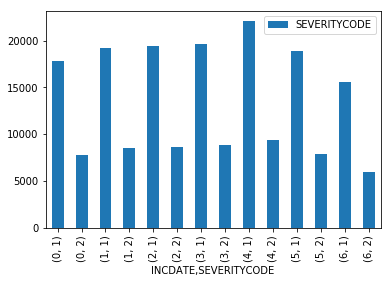

In [8]:
pic=df.groupby(['INCDATE'])['SEVERITYCODE'].value_counts().to_frame()
pic.plot(kind='bar')

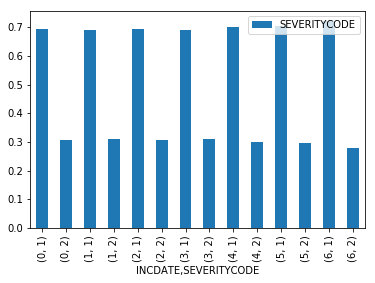

In [9]:
pic1=df.groupby(['INCDATE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()
pic1.plot(kind='bar')

###### Relationship between collision address type and severity

Collision address type has impact on severity, block is more likely to occur car accident, but intersection is more likely to occur fital car accidents.

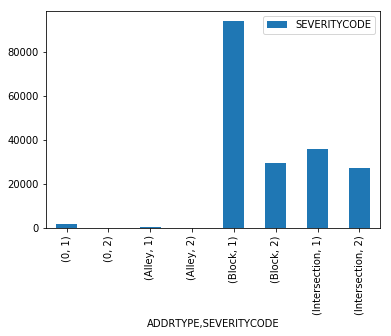

In [10]:
pic2=df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts().to_frame()
pic2.plot(kind='bar')

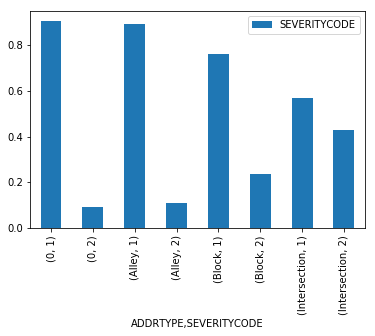

In [11]:
pic3=df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()
pic3.plot(kind='bar')

###### Relationship between collision type/junction place and severity

These factors have impact on severity.

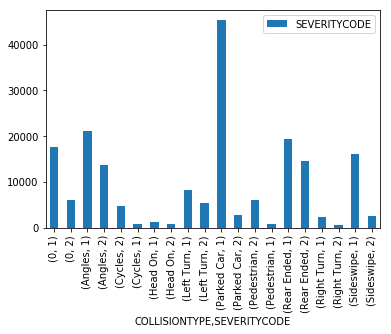

In [12]:
pic4=df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts().to_frame()
pic4.plot(kind='bar')

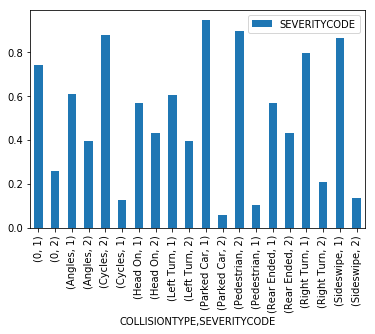

In [13]:
pic5=df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()
pic5.plot(kind='bar')

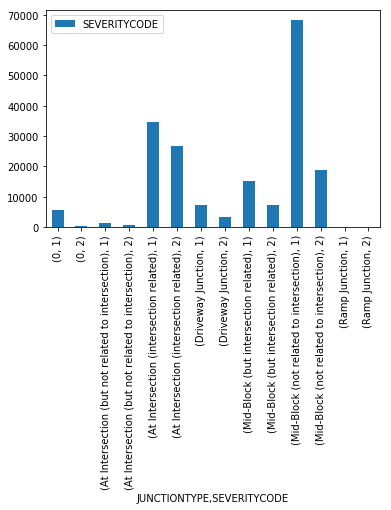

In [14]:
pic6=df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts().to_frame()
pic6.plot(kind='bar')

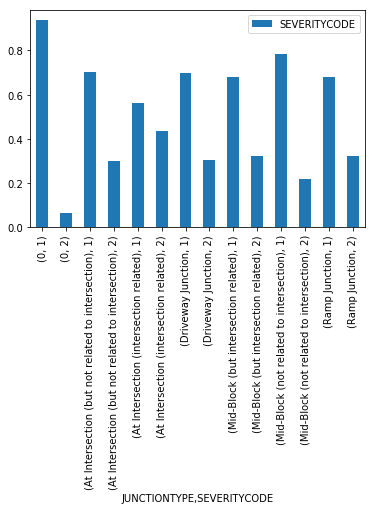

In [15]:
pic7=df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()
pic7.plot(kind='bar')

###### Relationship between weather/road conditions/light conditions and severity

These factors also have influences on severity; however, there are some conditions are too rare, so I will adjust these conditions before one hot encoding to simplify the madel.

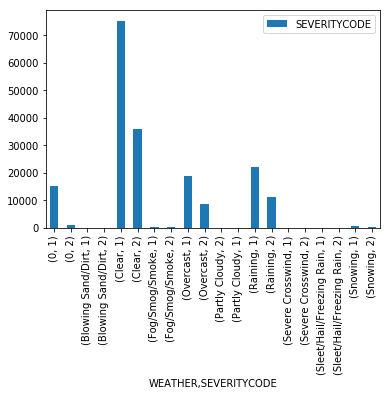

In [16]:
pic8=df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts().to_frame()
pic8.plot(kind='bar')

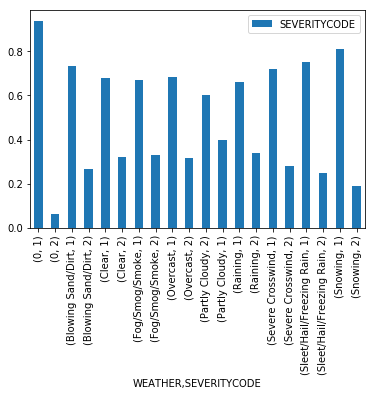

In [17]:
pic9=df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()
pic9.plot(kind='bar')

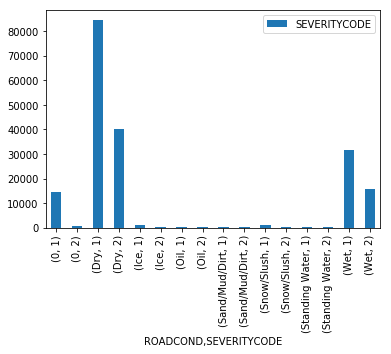

In [18]:
pic10=df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts().to_frame()
pic10.plot(kind='bar')

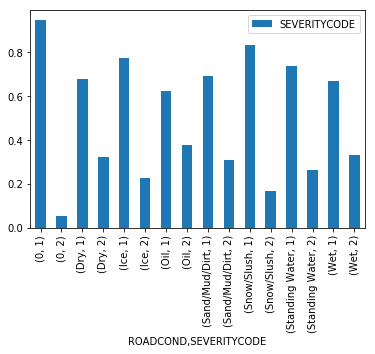

In [19]:
pic11=df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()
pic11.plot(kind='bar')

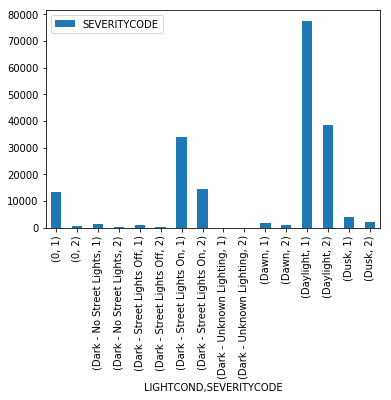

In [20]:
pic12=df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts().to_frame()
pic12.plot(kind='bar')

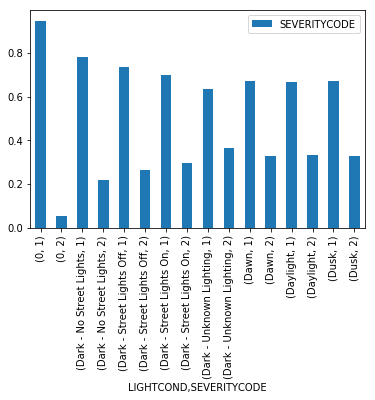

In [21]:
pic13=df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()
pic13.plot(kind='bar')

#### Pre-processing_2

In [22]:
df.drop(['INCDATE'],axis=1,inplace=True)

In [23]:
df['WEATHER'].replace(to_replace=['Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,0,0,0,0,0],inplace=True)
df['ROADCOND'].replace(to_replace=['Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,0,0,0,0],inplace=True)
df['LIGHTCOND'].replace(to_replace=['Dawn','Daylight','Dusk'], value=['Light','Light','Light'],inplace=True)
df['LIGHTCOND'].replace(to_replace=['Dark - Street Lights On','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'], value=['Dark','Dark','Dark','Dark'],inplace=True)

In [24]:
X=df[['STATUS', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
           'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR']]
y=df['SEVERITYCODE'].values

In [25]:
X=pd.concat([X,pd.get_dummies(df['ADDRTYPE'])], axis=1)
X.drop([0],axis=1,inplace=True)
X=pd.concat([X,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
X.drop([0],axis=1,inplace=True)
X=pd.concat([X,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
X.drop([0],axis=1,inplace=True)
X=pd.concat([X,pd.get_dummies(df['WEATHER'])], axis=1)
X.drop([0],axis=1,inplace=True)
X=pd.concat([X,pd.get_dummies(df['ROADCOND'])], axis=1)
X.drop([0],axis=1,inplace=True)
X=pd.concat([X,pd.get_dummies(df['LIGHTCOND'])], axis=1)
X.drop([0],axis=1,inplace=True)
X.head()

,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Clear,Overcast,Raining,Dry,Wet,Dark,Light
0,1,2,0,0,2,11,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,1
1,1,2,0,0,2,16,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,1,0
2,1,4,0,0,3,14,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,1,0,0,1
3,1,3,0,0,3,11,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,1,0,0,1
4,1,2,0,0,2,11,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1


In [26]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.00459094, -0.33875237, -0.18991352, -0.17182116,  0.05343064,
        -0.42686777, -0.43161881, -0.22468962, -0.1587787 , -0.22741933,
        -0.88556073, -0.1944711 , -0.06286131, -1.36752505,  1.40925415,
         2.11505725, -0.17137669, -0.1038246 , -0.27896382, -0.58173298,
        -0.18993158, -0.46792191, -0.12578468, -0.32971412, -0.10475391,
         1.447159  , -0.24246593, -0.36570527, -0.92118765, -0.02922871,
        -1.18868238,  2.41827524, -0.4599969 , -1.38107401,  1.73138788,
        -0.60825721,  0.72381211],
       [ 0.00459094, -0.33875237, -0.18991352, -0.17182116,  0.05343064,
         0.30230973, -0.43161881, -0.22468962, -0.1587787 , -0.22741933,
        -0.81667581, -0.1944711 , -0.06286131,  0.73124803, -0.70959521,
        -0.47280044, -0.17137669, -0.1038246 , -0.27896382, -0.58173298,
        -0.18993158, -0.46792191, -0.12578468,  3.03293048, -0.10475391,
        -0.69100907, -0.24246593, -0.36570527,  1.08555516, -0.02922871,
        -1.18868

## Modeling and Evaluating

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

#### 70% for training, 30% for evaluating

In [28]:
X, test_X, y, test_y = train_test_split( X, y, test_size=0.3, random_state=4)

#### K Nearest Neighbor and Support Vector Machine

Since the dataset is too large, KNN and SVM are not suitable.

#### Decision Tree

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
for i in range(4,10):
    DT=DecisionTreeClassifier(criterion="entropy", max_depth = i)
    DT.fit(X_train, y_train)
    DT_pre=DT.predict(X_test)
    print(i, '      ', (jaccard_similarity_score(y_test, DT_pre)+f1_score(y_test, DT_pre))/2)
    
#max_depth=8 has the best accuracy

4        0.7963697277829946
5        0.7963221169195861
6        0.7967959928418549
7        0.7998976942425119
8        0.8002969008090273
9        0.7988271432605216


In [30]:
DT=DecisionTreeClassifier(criterion="entropy", max_depth = 8)
DT.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Logistic Regression

In [31]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### Evaluating

In [32]:
#predict
DT_pre=DT.predict(test_X)
LR_pre=LR.predict(test_X)


# Jaccard
DT_J=jaccard_similarity_score(test_y, DT_pre)
LR_J=jaccard_similarity_score(test_y, LR_pre)

# F1-score
DT_F=f1_score(test_y, DT_pre)
LR_F=f1_score(test_y, LR_pre)

In [33]:
pd.DataFrame([['Decision Tree',DT_J,DT_F],
                          ['LogisticRegression',LR_J,LR_F]],
                        columns=['Algorithm','Jaccard','F1-score'])

,Algorithm,Jaccard,F1-score
0,Decision Tree,0.757838,0.847295
1,LogisticRegression,0.757363,0.845823


## Result

The best machine learning is Decision Tree when max_depth=8